# 단순선형회귀

> 속도에 따른 제동거리 예측 데이터셋

## #01. 준비작업

### [1] 패키지 가져오기

In [1]:
# 연결된 모듈이 업데이트 되면 즉시 자동 로드함
%load_ext autoreload
%autoreload 2

from hossam.util import *
from hossam.plot import *

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

from ipywidgets import interact

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### [2] 데이터셋 준비하기

In [2]:
origin = my_read_excel('https://data.hossam.kr/mldata/cars.xlsx', info=False)


상위 5개 행
+----+---------+--------+
|    |   speed |   dist |
|----+---------+--------|
|  0 |       4 |      2 |
|  1 |       4 |     10 |
|  2 |       7 |      4 |
|  3 |       7 |     22 |
|  4 |       8 |     16 |
+----+---------+--------+


## #02. 데이터 전처리

### [1] 훈련/검증 데이터 분리

In [7]:
x_train, x_test, y_train, y_test = my_train_test_split(origin, yname='dist', test_size=0.3)
rows, cols = x_train.shape
rows, cols

(35, 1)

## #03. 훈련 모델 적합

### [1] 신경망 정의

| 구분 | 모델 | 활성화 함수 | 옵티마이저 | 손실함수 | 평가지표 | 대표예제 |
|--|--|--|--|--|--|--|
| 회귀 | 단순선형회귀 | relu, linear | adam | mse | mae | |

In [8]:
model = Sequential()

model.add(Dense(2, activation='relu', input_shape=(cols, )))
model.add(Dense(1, activation='linear'))
model.compile(optimizer='adam', loss='mse', metrics=['mae'])
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                 │ (None, 2)              │             4 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │             3 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7 (28.00 B)

 Trainable params: 7 (28.00 B)

 Non-trainable params: 0 (0.00 B)

### [2] 학습하기

In [9]:
%%time
result = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=500, verbose=0)

evaluate1 = model.evaluate(x_train, y_train)
print("최종 훈련 손실률: %f, 최종 훈련 절대오차: %f" % (evaluate1[0], evaluate1[1]))

evaluate2 = model.evaluate(x_test, y_test)
print("최종 검증 손실률: %f, 최종 검증 절대오차: %f" % (evaluate2[0], evaluate2[1]))

result_df = DataFrame(result.history)
result_df["epochs"] = result_df.index + 1
result_df.set_index('epochs', inplace=True)
result_df

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step - loss: 255.1976 - mae: 11.1267  
최종 훈련 손실률: 258.935150, 최종 훈련 절대오차: 11.257329
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 381.3294 - mae: 15.0633
최종 검증 손실률: 381.329376, 최종 검증 절대오차: 15.063275
CPU times: total: 25.4 s
Wall time: 24.5 s


,loss,mae,val_loss,val_mae
epochs,,,,
1,1723.922241,34.284885,1494.130737,31.941065
2,1719.637939,34.233303,1490.653442,31.893942
3,1715.506470,34.183624,1487.189331,31.846924
4,1711.112671,34.131897,1483.720581,31.799770
5,1707.134277,34.082584,1480.323486,31.753513
...,...,...,...,...
496,262.383209,11.289235,382.453735,15.009138
497,261.683990,11.283839,382.190338,15.021467
498,260.990631,11.277754,381.906525,15.034982


### [3] 훈련 결과 시각화

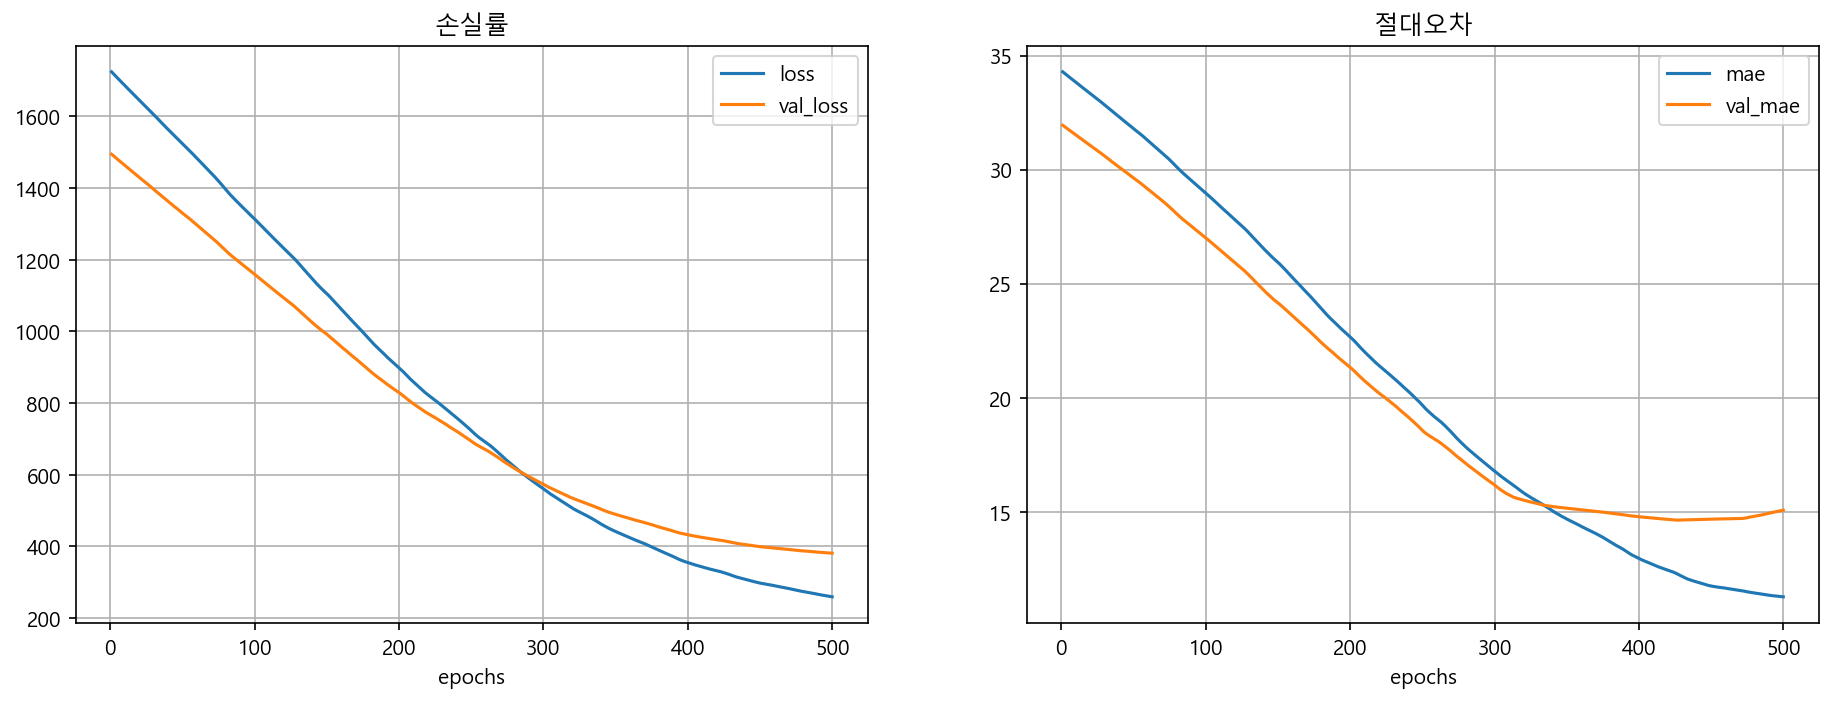

In [10]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5), dpi=150)
result_df.plot(y=['loss', 'val_loss'], ax=ax[0])
result_df.plot(y=['mae', 'val_mae'], ax=ax[1])
ax[0].set_title('손실률')
ax[1].set_title('절대오차')
ax[0].grid()
ax[1].grid()
plt.show()
plt.close()

## #04. 예측 결과 활용

### [1] 예측치 구하기

In [11]:
pred = model.predict(x_test, verbose=0)
pred

array([[43.82377 ],
       [31.496746],
       [29.031338],
       [51.219986],
       [19.169716],
       [41.358364],
       [51.219986],
       [46.289177],
       [36.42755 ],
       [21.635122],
       [46.289177],
       [48.75458 ],
       [41.358364],
       [46.289177],
       [33.962147]], dtype=float32)

### [2] 결과 데이터 셋 구성

In [12]:
kdf = DataFrame({
    '검증데이터': x_test['speed'],
    '실제값': y_test, 
    '예측값': pred.flatten()
})

kdf['오차'] = kdf['실제값'] - kdf['예측값']

my_pretty_table(kdf)
    

+----+--------------+----------+----------+----------+
|    |   검증데이터 |   실제값 |   예측값 |     오차 |
|----+--------------+----------+----------+----------|
| 28 |           17 |       32 |  43.8238 | -11.8238 |
| 11 |           12 |       14 |  31.4967 | -17.4967 |
| 10 |           11 |       28 |  29.0313 | -1.03134 |
| 41 |           20 |       56 |    51.22 |  4.78001 |
|  2 |            7 |        4 |  19.1697 | -15.1697 |
| 27 |           16 |       40 |  41.3584 | -1.35836 |
| 38 |           20 |       32 |    51.22 |   -19.22 |
| 31 |           18 |       42 |  46.2892 | -4.28918 |
| 22 |           14 |       80 |  36.4276 |  43.5724 |
|  4 |            8 |       16 |  21.6351 | -5.63512 |
| 33 |           18 |       76 |  46.2892 |  29.7108 |
| 35 |           19 |       36 |  48.7546 | -12.7546 |
| 26 |           16 |       32 |  41.3584 | -9.35836 |
| 34 |           18 |       84 |  46.2892 |  37.7108 |
| 18 |           13 |       46 |  33.9621 |  12.0379 |
+----+--------------+--

### [3] 관측치와 예측치 비교 시각화

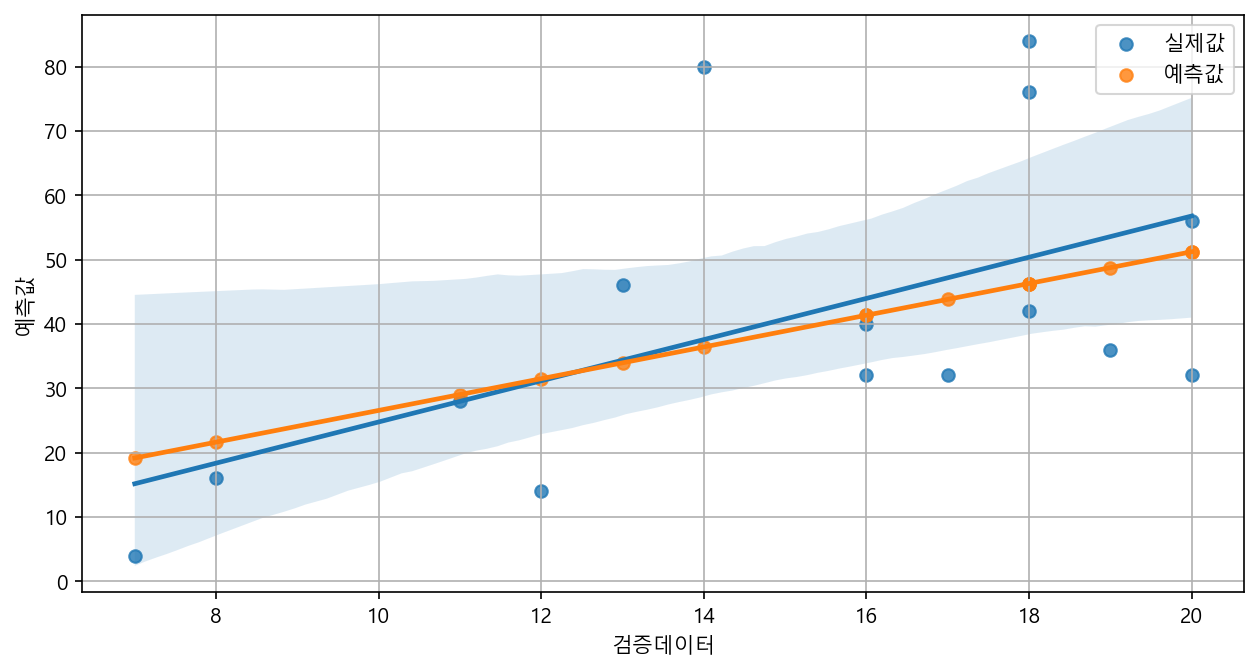

In [13]:
fig = plt.figure(figsize=(10, 5), dpi=150)
ax = fig.gca()

sb.regplot(data=kdf, x='검증데이터', y = '실제값', label='실제값', ax=ax)
sb.regplot(data=kdf, x='검증데이터', y = '예측값', label='예측값', ax=ax)
ax.legend()
ax.grid()
plt.show()
plt.close()


### [3] 임의의 값에 대한 머신러닝 예측 결과

#### (1) 단일 값을 통한 예측

In [14]:
my_speed = 50
my_speed_arr = np.array([[my_speed]])
my_dist = model.predict(my_speed_arr, verbose=0)
print('속도가 %d인 자동차의 제동거리는 %d로 예상됩니다.' % (my_speed, my_dist))

속도가 50인 자동차의 제동거리는 125로 예상됩니다.


### [4] 사용자 인터페이스 적용

In [16]:
@interact(x=(0, 100, 1))
def test(x):
    #print(x)
    input_x = np.array([[x]])
    output_y = model.predict(input_x, verbose=0)
    print('속도가 %d인 자동차의 제동거리는 %d로 예상됩니다.' % (x, output_y))
    

interactive(children=(IntSlider(value=50, description='x'), Output()), _dom_classes=('widget-interact',))

In [18]:
@interact(my_choose=['test', 'pred'])
def show_data(my_choose):
    yname = '실제값' if my_choose == 'test' else '예측값'
    
    fig = plt.figure(figsize=(10, 5), dpi=150)
    ax = fig.gca()
    sb.regplot(data=kdf, x='검증데이터', y=yname, ax=ax)
    ax.grid()
    plt.show()
    plt.close()

interactive(children=(Dropdown(description='my_choose', options=('test', 'pred'), value='test'), Output()), _d…